<a href="https://colab.research.google.com/github/Demshin82/AI-architect/blob/master/%D0%94%D0%97%E2%84%966_%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Загружаем ДатаСет TITANIC в объект DataFrame (DS - Data Set)

In [ ]:
DS = pd.read_csv('Titanic-Dataset.csv')
DS

Добавляем столбец Die и заполняем его противоположными столбцу Survived данными

In [ ]:
DS['Die'] = abs(DS['Survived']-1)               # Создание и заполнение столбца
DS.sort_values(by='Age')                        # Сортировка Дата-Сета по возрасту

Определяем средний возраст в исходном дата-сете и заполняем им пустые ячейки

In [ ]:
mean_age = (DS['Age'].mean() * 10)//10          # округление среднего возраста до целого
DS['Age'].fillna(mean_age, inplace=True)        # Заполнение пустых ячеек
DS

Подгатавливаем DataFrame с выжившими и умершими возрастами

In [ ]:
DS_Survived = DS.pivot_table(values='Survived', index=['Age'], aggfunc="sum" ) # делаем сводную аналитику - кол-во выживших
DS_Survived

In [ ]:
DS_Die= DS.pivot_table(values='Die', index=['Age'], aggfunc="sum" ) # делаем сводную аналитику - кол-во умерших
DS_Die

Определяем функцию обработки списка для вычисления возрастных групп

In [100]:
def age_group(age):
    return (age // 10) * 10

Создаём датафрейм DS_Common и собираем в него данные для отрисовки

In [127]:
DS_Common = pd.DataFrame(columns=['AgeGroup', 'Survived', 'Die'])
DS_Common['Survived']=DS_Survived['Survived']
DS_Common['Die']=DS_Die['Die']
DS_Common['AgeGroup']=age_group(DS_Common.index)
DS_Common

,Survived,Die
AgeGroup,,
0.0,38,24
10.0,41,61
20.0,129,268
30.0,73,94
40.0,34,55
50.0,20,28
60.0,6,13
70.0,0,6
80.0,1,0


Пруппируем данные в датафрейм DS_Plot для отрисовки

In [ ]:
DS_Plot = DS_Common.groupby(['AgeGroup']).sum()
DS_Plot

Параметризируем и отрисовываем гистограмму

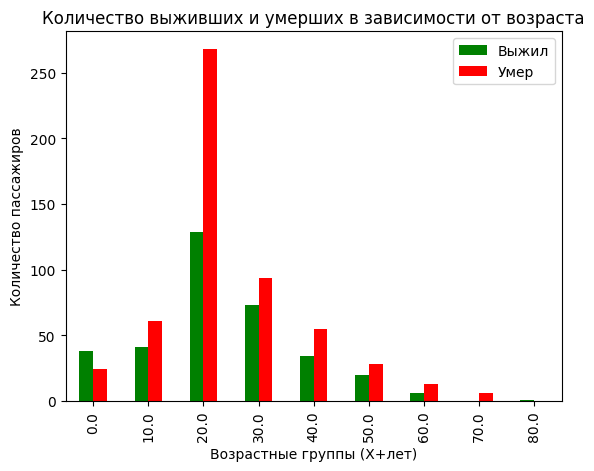

In [133]:
DS_Plot.plot(kind='bar', stacked=False, color=['green', 'red'])
plt.title('Количество выживших и умерших в зависимости от возраста')
plt.xlabel('Возрастные группы (Х+лет)')
plt.ylabel('Количество пассажиров')
plt.legend(['Выжил', 'Умер'])

# Отображаем график
plt.show()
